In [2]:
#Imagens de uma url
from PIL import Image
import requests

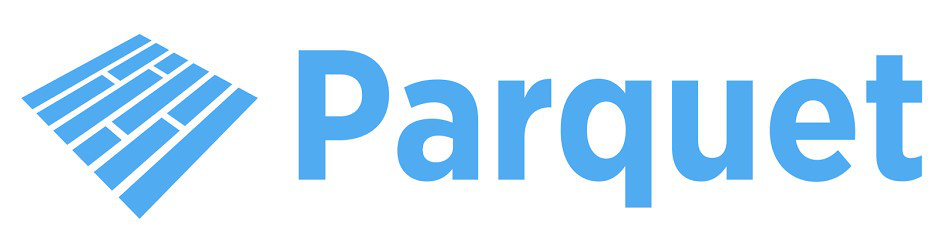

In [3]:
Image.open(requests.get('https://miro.medium.com/max/1880/0*KZjtgrCkeF3kh8bH', stream=True).raw)

## Parte 1: Parquet
### - Criação e História
### - Vantagens e Desvantagens
### - Como funciona?
## Parte 2: comparativo Parquet e outros formatos de arquivo
### - Parquet e seu "principal" rival Avro
### - Outros formatos
## Parte 3 Parquet e pandas
### - Bibliotecas python
### - Comparativo de armazenamento
### - Comparativo de velocidade
## Parte4 Final
### - Quando usar?


# Parte 1
## Parquet é um um formato de arquivo open source, disponível principlamente para qualquer projeto no ecosistema Hadoop.

## Foi lnaçado em 13 março 2013 

## O formato Parquet é designado para alta performace e eficiência em armazenamento de dados orientado por colunas, que é diferente do classico formato orientado por linhas como no arquivo CSV

----------------

# Vantagens
## - Leitura de arquivos rápida
## - Compacto(consome pouco espaço de HD) 
## - Ideal para dados que serão armazenados por muito tempo 
## - Ideal para paralelismo, processamento distribuido 
## - Alta velocidade em filtros ligados a colunas
## - Compativel com várias plataformas
# Desvantagens
# - Arquivos Parquet são imutáveis* (pode substituir dados)
## - Necessita de "scheme"(definir o tipo de dado de cada coluna)
## - Tempo para escrever/criar um arquivo é longo

# Como Funciona?

## As informações são arquivadas por colunas e não por linhas, isso permite uma busca mais precisa quando se faz filtros "por" coluna, funciona muito bem em "ninhos", por poder separar as colunas e  agrupar os dados por coluna em cada cluster(paralelismo)

# Vamos a dois exemplos de oreintação, por linha (classico CSV) e por coluna (Parquet) 

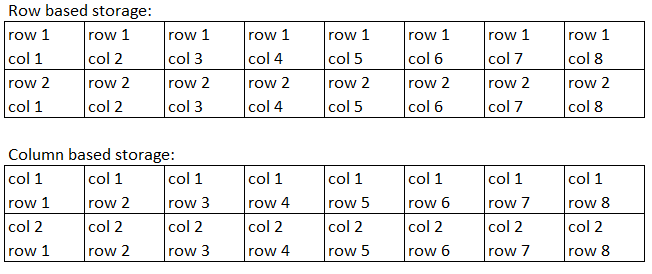

In [4]:
#Orientado no formato de linha e de coluna
Image.open(requests.get('https://miro.medium.com/max/652/1*JcAz4mKQ0kOpoHcZZQEmYg.png', stream=True).raw)

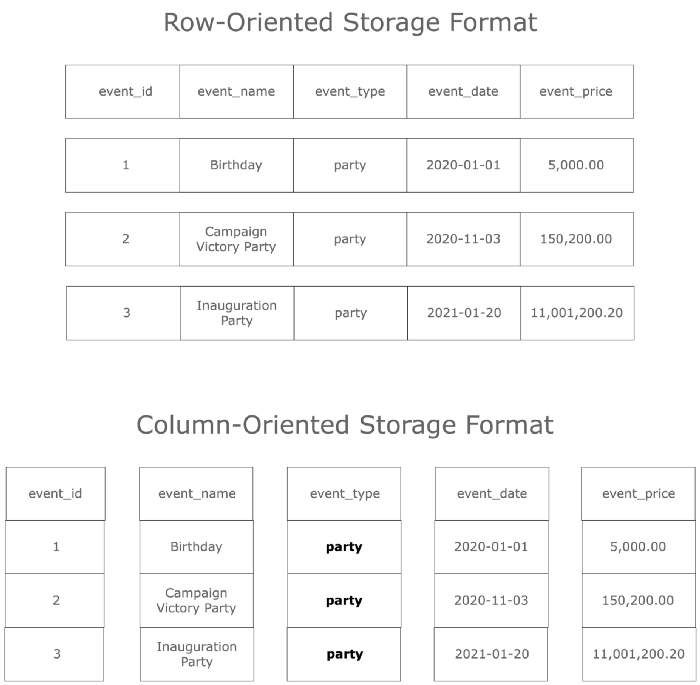

In [5]:
#Orientado no formato de linha e de coluna
Image.open(requests.get('https://miro.medium.com/max/700/1*dwGGDr7HA76J6sMYt0A8iQ.png', stream=True).raw)

# Indo mais fundo na estrutura do Parquet:

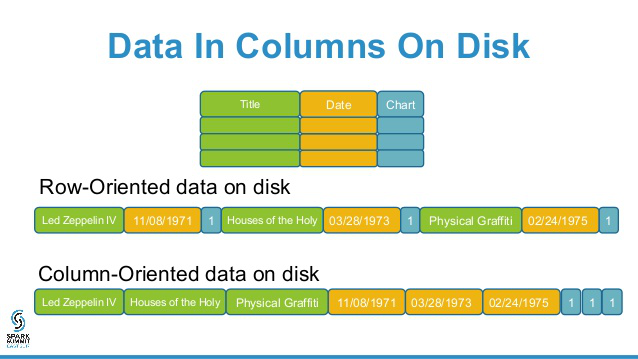

In [6]:
Image.open(requests.get('https://image.slidesharecdn.com/6bcurtinstrickland-170215222253/95/spark-parquet-in-depth-spark-summit-east-talk-by-emily-curtin-and-robbie-strickland-39-638.jpg?cb=1487197503', stream=True).raw)

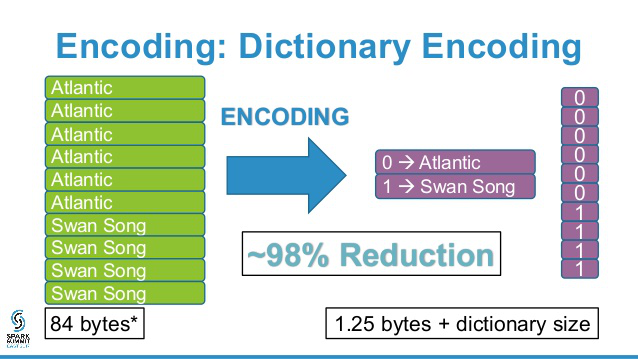

In [7]:
Image.open(requests.get('https://image.slidesharecdn.com/6bcurtinstrickland-170215222253/95/spark-parquet-in-depth-spark-summit-east-talk-by-emily-curtin-and-robbie-strickland-41-638.jpg?cb=1487197503', stream=True).raw)

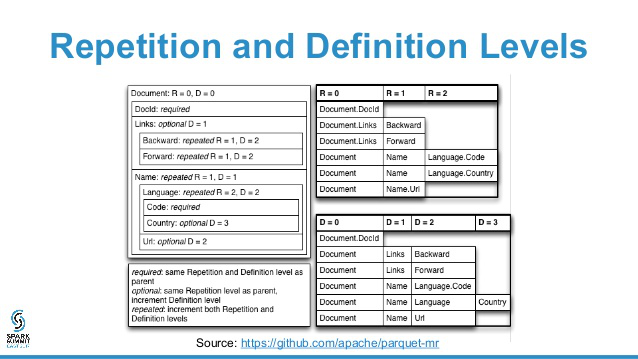

In [8]:
Image.open(requests.get('https://image.slidesharecdn.com/6bcurtinstrickland-170215222253/95/spark-parquet-in-depth-spark-summit-east-talk-by-emily-curtin-and-robbie-strickland-32-638.jpg?cb=1487197503', stream=True).raw)
# https://github.com/apache/parquet-mr

# Importante ao realizar uma consulta:

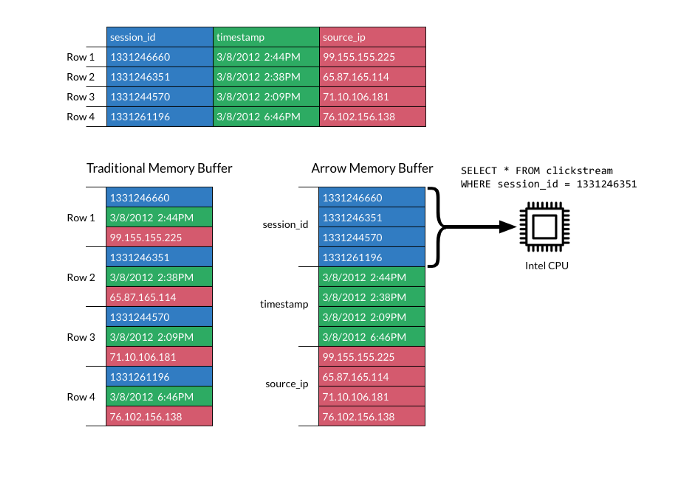

In [9]:
# Com funciona 
Image.open(requests.get('https://miro.medium.com/max/700/0*b3jEIVWk_m0_J9jH.png', stream=True).raw)

# Principal "rival" 
## Parquet(column-oriented) vs Avro (row-oriented)

### por que usamos CSV mais do que qualquer outro arquivo?
- (por ser facíl de entender e alterar) read-friendly 

## Avro: é orientado por linha, o que permite evolução de schema (remover colunas, adicionar colunas, e outros)
- o Parquet é feito idealmente para sua estutura/schema não ser alterada

## Parquet:Você paga só pelo que você usa em arquivos orientados por coluna!
## você só carrega as colunas requisitadas pelo usuário/tarefa reduz volume ocupado na memoria e velocidade de acesso!

## Parquet é mais popular!
## De forma nativa, é simples migrar de um pipeline em Avro para um em Parquet

https://blog.datasyndrome.com/python-and-parquet-performance-e71da65269ce
https://blog.matthewrathbone.com/2019/12/20/parquet-or-bust.html

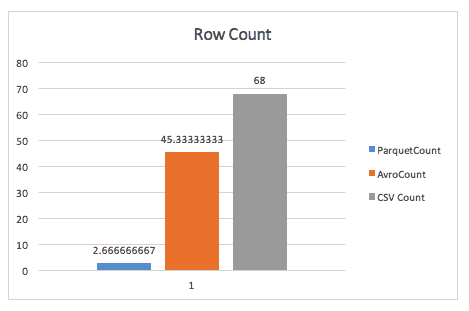

In [10]:
# Para uma base de 200Gb alguns testes foram feitos, um exemplo foi a contagem de linhas 
# tempo em segundos
Image.open(requests.get('https://d33wubrfki0l68.cloudfront.net/3e04108c3f05a75c674c2900c240553335cbbfc7/82472/img/blog/parquet-good/parquet-row-count.png', stream=True).raw)

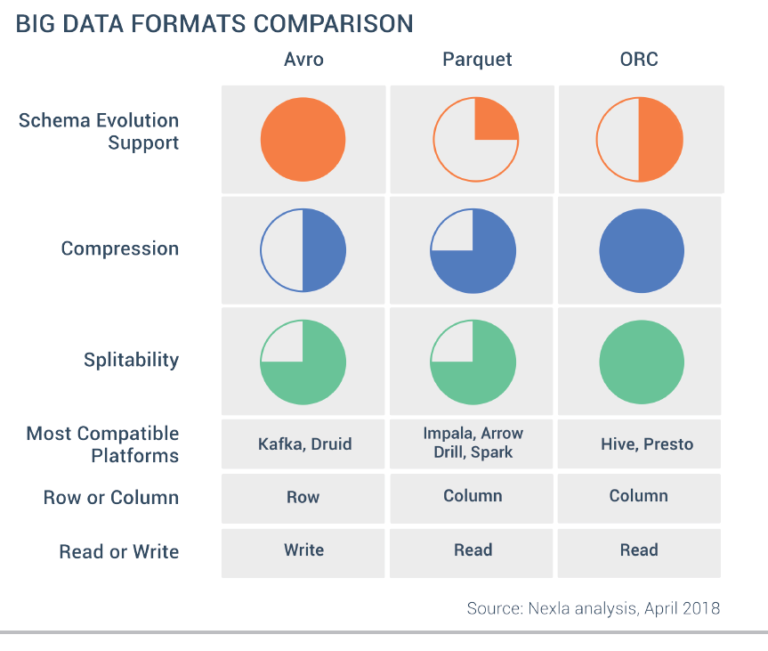

In [11]:
Image.open(requests.get('https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/Nexla-File-Format-768x651.png', stream=True).raw)


# Parte 3 Pandas 
## Bibliotecas em python que trabalhão com Parquet: 
## - Pandas
## - PyArrow
## - Fastparquet
## - AWS Data Wrangler
## - PySpark
## - Dask
--------

## Vamos instalar as Bibliotecas para que o pandas consiga ler e escrever no formato Parquet:

In [12]:
# !pip install fastparquet
# !pip install pyarrow
import fastparquet #fp
import pyarrow  #pa

In [13]:
import pandas as pd 
import numpy as np
import time
from pathlib import Path

In [14]:
# criando um Dataset 3MB
col = list(range(0,1000))
strcol =['c' + str(i) for i in col]
           
df = pd.DataFrame(np.random.randint(0,100,size=(1000, 1000)), columns=strcol)
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c990,c991,c992,c993,c994,c995,c996,c997,c998,c999
0,15,12,47,9,3,37,0,66,85,21,...,77,40,76,10,49,84,68,92,28,18
1,8,73,11,91,58,65,13,20,3,26,...,9,60,34,45,97,28,9,52,53,89
2,32,73,8,26,39,81,40,25,27,11,...,7,88,11,33,64,6,94,35,62,45
3,97,30,26,17,74,55,41,66,39,99,...,59,16,25,43,1,61,69,50,93,94
4,12,68,63,5,75,47,91,81,93,86,...,27,84,98,95,23,58,21,66,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,46,66,51,13,84,9,74,4,71,28,...,85,95,85,31,51,1,12,29,70,86
996,32,62,18,94,75,70,54,84,69,88,...,17,66,38,18,57,90,86,65,87,61
997,14,12,20,6,8,42,89,92,47,72,...,67,90,26,59,2,16,13,92,73,61
998,85,8,72,35,53,47,49,17,21,56,...,18,21,20,8,12,65,34,21,36,78


In [15]:
#https://blog.datasyndrome.com/python-and-parquet-performance-e71da65269ce
df.to_parquet(
    'dados_parquet.parquet', 
    engine='pyarrow', #ou 'fastparquet'
    compression='snappy', #outros estilos de compressão, cada um com sua vantagem
 )

In [16]:
df.to_parquet(
    'dados_parquet_BROTLI.parquet', 
    engine='fastparquet',
    compression='UNCOMPRESSED', # 'BROTLI', 'GZIP', 'UNCOMPRESSED'
 )

###  É possivel fazer a leitura direto pelo pyarrow, assim como os tratamentos e consultas, ele tem sua própria API

In [17]:
table = pyarrow.Table.from_pandas(df)
table

pyarrow.Table
c0: int64
c1: int64
c2: int64
c3: int64
c4: int64
c5: int64
c6: int64
c7: int64
c8: int64
c9: int64
c10: int64
c11: int64
c12: int64
c13: int64
c14: int64
c15: int64
c16: int64
c17: int64
c18: int64
c19: int64
c20: int64
c21: int64
c22: int64
c23: int64
c24: int64
c25: int64
c26: int64
c27: int64
c28: int64
c29: int64
c30: int64
c31: int64
c32: int64
c33: int64
c34: int64
c35: int64
c36: int64
c37: int64
c38: int64
c39: int64
c40: int64
c41: int64
c42: int64
c43: int64
c44: int64
c45: int64
c46: int64
c47: int64
c48: int64
c49: int64
c50: int64
c51: int64
c52: int64
c53: int64
c54: int64
c55: int64
c56: int64
c57: int64
c58: int64
c59: int64
c60: int64
c61: int64
c62: int64
c63: int64
c64: int64
c65: int64
c66: int64
c67: int64
c68: int64
c69: int64
c70: int64
c71: int64
c72: int64
c73: int64
c74: int64
c75: int64
c76: int64
c77: int64
c78: int64
c79: int64
c80: int64
c81: int64
c82: int64
c83: int64
c84: int64
c85: int64
c86: int64
c87: int64
c88: int64
c89: int64
c90: i

In [18]:
import pyarrow.parquet as pq

In [19]:
pq.write_table(table, 'example_pyarrow.parquet')


In [20]:
tabel_c1_c12 = pq.read_table('example_pyarrow.parquet', columns=['c1','c12'])
tabel_c1_c12


pyarrow.Table
c1: int64
c12: int64

In [21]:
tabel_c1_c12.to_pandas()

,c1,c12
0,12,1
1,73,21
2,73,49
3,30,97
4,68,78
...,...,...
995,66,61
996,62,83
997,12,46
998,8,91


In [22]:
# df = pd.DataFrame(np.row_stack(array_lst),columns=strcol)
df.to_csv('dados_csv.csv')
df.to_csv('dados_zip.csv.gz',compression='gzip')
df.to_parquet('dados_parquet.parquet')
df.to_hdf('frame_hdf.hdf','main')
df.to_feather('dados_ftr.ftr')

In [23]:
Path('dados_csv.csv').stat().st_size/ 1024

2840.0947265625

In [24]:
Path('dados_zip.csv.gz').stat().st_size/ 1024

1029.9794921875

In [25]:
Path('frame_hdf.hdf').stat().st_size/ 1024

7833.1953125

In [26]:
Path('dados_parquet.parquet').stat().st_size/ 1024

1866.8681640625

In [27]:
Path('dados_ftr.ftr').stat().st_size / 1024

3387.447265625

## Tempo de leitura

In [28]:
t1=time.time()
read_csv = pd.read_csv('dados_zip.csv.gz')
t2=time.time()
t2 - t1

0.15290427207946777

In [29]:
t1=time.time()
read_csv = pd.read_csv('dados_csv.csv')
t2=time.time()
t2 - t1

0.13683581352233887

In [30]:
t1=time.time()
read_parquet = pd.read_parquet('dados_parquet.parquet')
t2=time.time()
t2 - t1

0.1505870819091797

In [31]:

t1=time.time()
read_parquet = pd.read_parquet('dados_parquet_BROTLI.parquet')
t2=time.time()
t2 - t1

0.1301250457763672

In [32]:
t1=time.time()
read_parquet = pq.read_table('example_pyarrow.parquet')
t2=time.time()
t2 - t1

0.12169313430786133

In [33]:
t1=time.time()
read_feather = pd.read_feather('dados_ftr.ftr')
t2=time.time()
t2 - t1

0.040880441665649414

In [34]:
t1=time.time()
read_hdf = pd.read_hdf('frame_hdf.hdf','main')
t2=time.time()
t2 - t1

0.015685319900512695

# Parte 4 Final

## O objetvio do parquet é para ser usado com volumes colossais de dados, onde você pode distribuir o volume em diversos clusters(paralelismo), a estrutura dele facilita as consultas nesse tipo de ambiente.

## Esse volume não seria suportado em uma máquina utilizando pandas, o ideal é utilizar o spark(aplicação para gerenciar paralelismo) com a linguagem python(o codigo é muito similar a estrutura que usamos no pandas)


# Bons estudos!

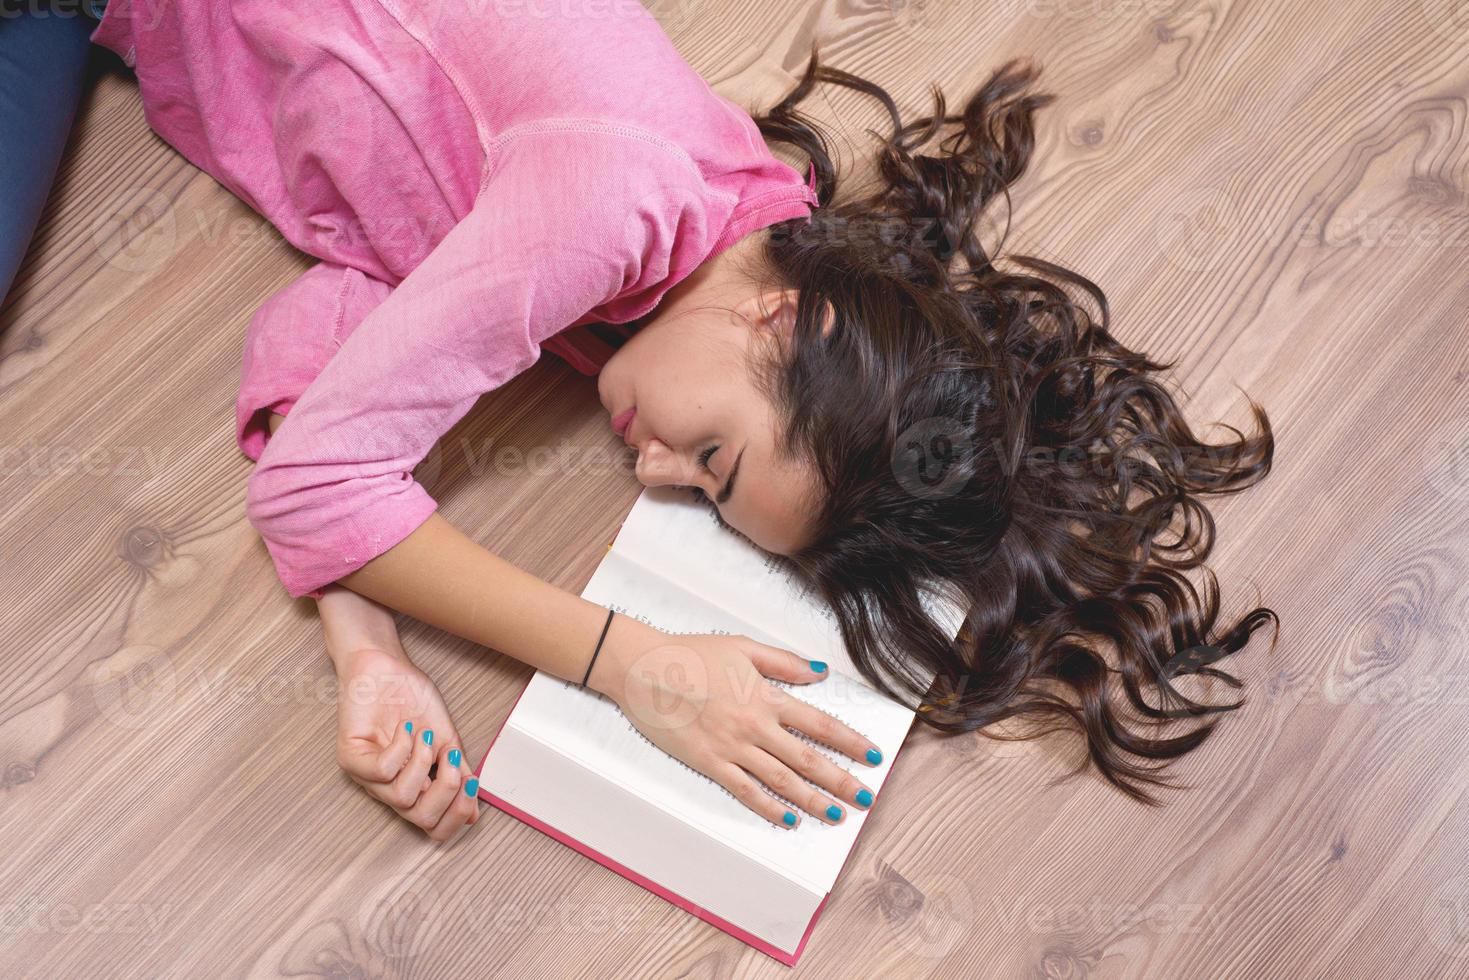

In [35]:
Image.open(requests.get('https://static.vecteezy.com/ti/fotos-gratis/p1/1216945-menina-estudante-dormindo-no-parquet-com-livro-foto.jpg', stream=True).raw)